Informática - 1º de Física
<br>
**Introducción a la Programación**
<br>
<p style="color:#808080"> <small><small>
24/10/2018
</small></small></p>

## Tema 6. Gráficas

Exagerando un poco, el objetivo final de la computación científica y del análisis de datos es producir visualizaciones atractivas: "una imagen vale más que mil números". 

El mundo del los gráficos por ordenador es inmenso: desde una sencilla representación de funciones hasta los videojuegos con realidad virtual, con imágenes en 2D o 3D, estáticas o interactivas, animaciones y vídeos... las posibilidades son infinitas. 
En el tiempo limitado de que disponemos solo podemos hacer una breve introducción a [matplotlib](https://en.wikipedia.org/wiki/Matplotlib), la principal herramienta de visualización del entorno científico de Python. Aquí hay una [galería](https://matplotlib.org/devdocs/gallery/) con el tipo de gráficas que se pueden crear.

La visualización de datos tiene un importante componente artístico pero en el fondo es un instrumento de comunicación y por tanto su objetivo fundamental es transmitir información con claridad ([Tufte](https://en.wikipedia.org/wiki/Edward_Tufte)).


Como ocurre al aprender cualquier herramienta informática, no merece la pena aprender nada de memoria. Lo mejor es preparar una colección de ejemplos de código para resolver las tareas más frecuentes. En caso de duda o para hacer algo nuevo puedes consultar la documentación oficial en el menú 'Help->matplotlib' o buscar directamente en google.



### import

En programas "normales" las gráficas se muestran en ventanas independientes. Más adelante veremos algunos ejemplos. 
Pero en los notebooks debemos añadir el comando especial `%matplotlib inline` para que se incluyan directamente en el documento. La forma usual de importar el módulo es la siguiente:

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline

### plot

El "comando" gráfico fundamental es `plot`. En su forma más sencilla admite dos contenedores con las coordenadas $x$ e $y$ de los vértices de una *polilínea*.

![plot](graph/plot.png)

Muchas gráficas se pueden construir mediante una serie de  comandos plot con diferentes colores, estilos de línea y otras características. Por ejemplo, cuando los vértices están muy próximos podemos conseguir la apariencia de una línea curva. Pero también existen muchos otros comandos gráficos para conseguir prácticamente cualquier efecto que deseemos.

Para representar funciones lo usual es crear un array con una discretización del dominio de interés.

In [2]:
x = np.linspace(0,2*np.pi,200)

Directamente usamos las funciones matemáticas sobre arrays (con prefijo `np.`) para crear las coordenadas requeridas por `plot`. Si se omiten las coordenadas $x$ se utilizan los índices de cada elemento.

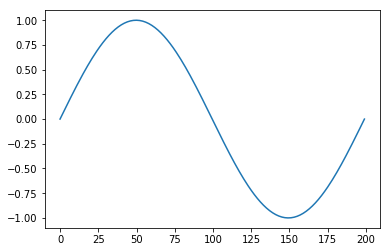

In [3]:
plt.plot(np.sin(x))

Para que no se muestre la información sobre los objetos gráficos creados ponemos un `;` al final.

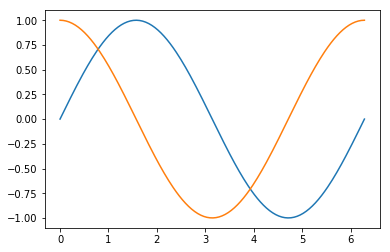

In [4]:
plt.plot(x,np.sin(x), x,np.cos(x));

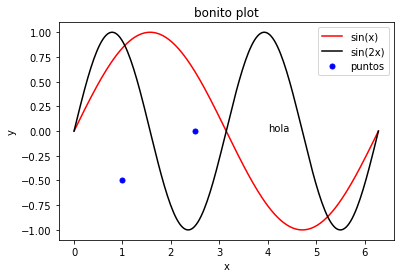

In [5]:
plt.plot(x,np.sin(x),color='red')
plt.plot(x,np.sin(2*x),color='black')
plt.plot([1,2.5],[-0.5,0],'.',color='blue',markerSize=10);
plt.legend(['sin(x)','sin(2x)','puntos']);
plt.xlabel('x'); plt.ylabel('y'); plt.title('bonito plot');
plt.text(4,0,'hola');

(0, 3)

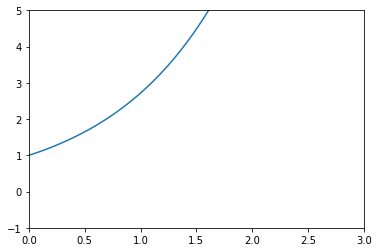

In [6]:
plt.plot(x,np.exp(x)); # plt.axis([0,3,-1,5]);
plt.ylim(-1,5)
plt.xlim(0,3)

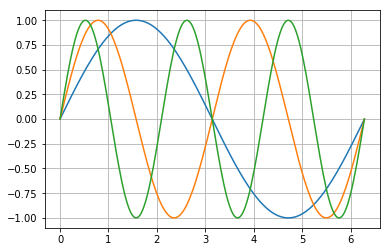

In [7]:
for k in [1,2,3]:
    plt.plot(x,np.sin(k*x))
plt.grid()

Curvas paramétricas:

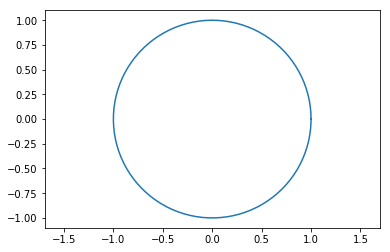

In [8]:
t = np.linspace(0,2*np.pi,200)

xc = np.cos(t)
yc = np.sin(t)

plt.plot(xc,yc); plt.axis('equal');

(-73.11339803863943, 82.47020567305, -77.35202275047877, 67.93563481055978)

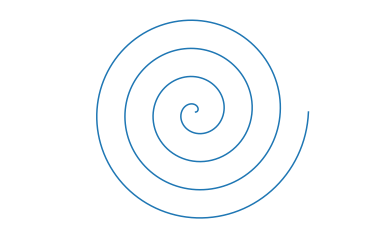

In [9]:
def espiral(n):
    t = np.linspace(0,n*2*np.pi,1000)
    r = 3 * t
    x = r * np.cos(t)
    y = r * np.sin(t)
    plt.plot(x,y)

espiral(4)
plt.axis('equal')
plt.axis('off')

In [10]:
def randwalk(n,s):
    p = s*np.random.randn(n,2)
    r = np.cumsum(p,axis=0)
    x = r[:,0]
    y = r[:,1]
    plt.plot(x,y)

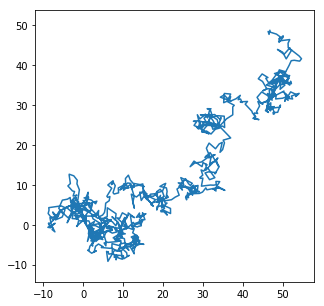

In [11]:
plt.figure(figsize=(5,5))
randwalk(1000,1)
plt.axis('equal');

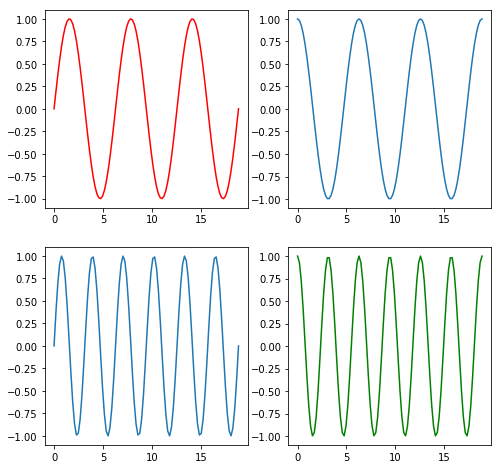

In [12]:
plt.figure(figsize=(8,8))
x = np.linspace(0,6*np.pi,100);

plt.subplot(2,2,1)
plt.plot(x,np.sin(x),color='red')

plt.subplot(2,2,2)
plt.plot(x,np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,np.sin(2*x))

plt.subplot(2,2,4)
plt.plot(x,np.cos(2*x),color='green');

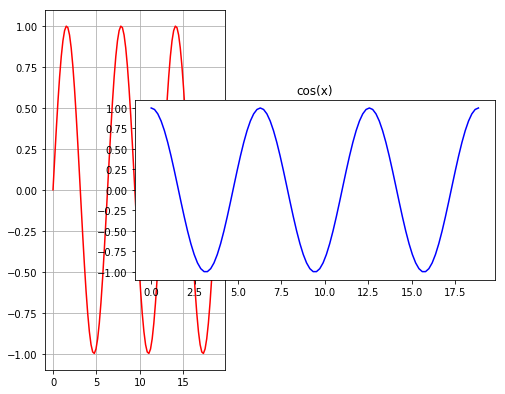

In [13]:
x = np.linspace(0,6*np.pi,100);

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0,0,0.5,1])
ax1.plot(x,np.sin(x),color='red')
ax1.grid()
ax2 = fig.add_axes([0.25,0.25,1,0.5])
ax2.set_title('cos(x)')
ax2.plot(x,np.cos(x),color='blue');

### 3D *

In [14]:
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

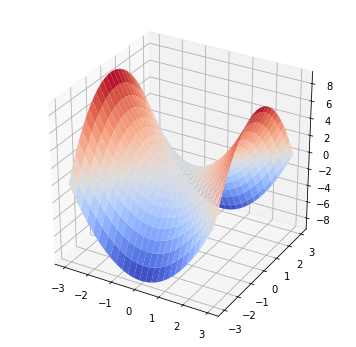

In [15]:
r = np.linspace(-3,3,50)
x,y = np.meshgrid(r,r)

z = x**2-y**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0.5, rstride=2, cstride=2);

Si en vez del comando `%matplotlib inline` usamos simplemente `%matplotlib` se abrirá una ventana interactiva con el gráfico, pero no se incluirá en el documento.

Otra forma de representar la altura de una superficie es mediante colores:

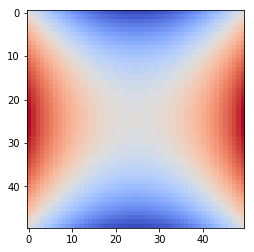

In [16]:
plt.imshow(z,'coolwarm');

O mediante curvas de nivel:

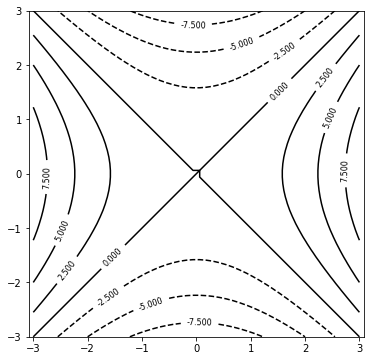

In [17]:
plt.figure(figsize=(6,6))

CS = plt.contour(x,y, z, colors=['black']);
plt.clabel(CS, inline=1, fontsize=8)
plt.axis('equal');

Otro ejemplo.

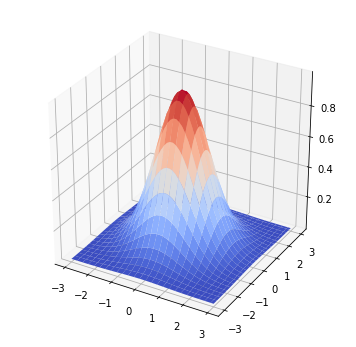

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

z = np.exp(-0.5*(x**2+y**2))

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0.5, rstride=2, cstride=2);

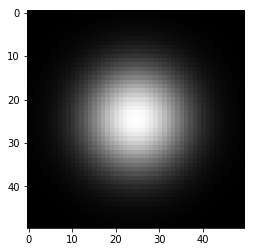

In [19]:
plt.imshow(z,'gray');

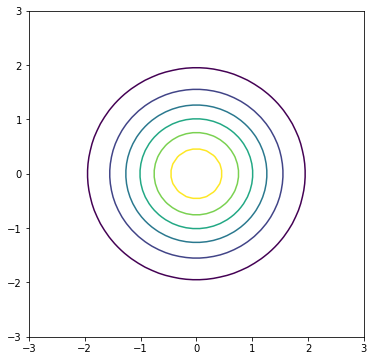

In [20]:
plt.figure(figsize=(6,6))

plt.contour(x,y,z);

Se puede representar cualquier superficie de forma paramétrica. Por ejemplo, una esfera se consigue fácilmente con coordenadas esféricas:

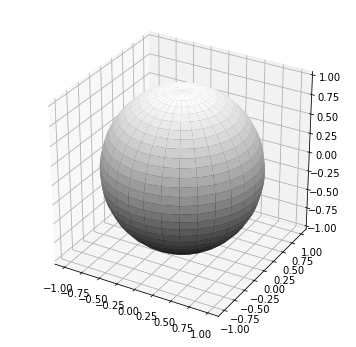

In [21]:
u = np.linspace(0.0, 2.0 * np.pi, 30)
v = np.linspace(0.0, np.pi, 30)
x_0 = np.outer(np.cos(u), np.sin(v))
y_0 = np.outer(np.sin(u), np.sin(v))
z_0 = np.outer(np.ones_like(u), np.cos(v))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_0,y_0,z_0, cmap='gray');

### interactivo *

In [22]:
from ipywidgets import interact

t = np.linspace(0,2*np.pi,1000);

@interact(freq=(1.,5))
def fun(freq):
    plt.plot(t,np.sin(freq*t))
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='freq', max=5.0, min=1.0), Output()), _dom_classes=('widget-interact',))

### animaciones *

Para que funcionen las animaciones es necesario el siguiente comando en "anaconda terminal":

    conda install -y ffmpeg --channel conda-forge

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')
%matplotlib inline

In [24]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2*np.pi))
ax.set_ylim((-1.1, 1.1))
plt.close();

[line] = ax.plot([], [])

x = np.linspace(0,2*np.pi,300)

def animate(t):
    line.set_data(x,np.sin(2*x-t*2*np.pi/100))
    return ()

animation.FuncAnimation(fig, animate, frames=100, interval=1000/25, blit=True)

In [25]:
x = np.linspace(0,2,100)

def wave(lam,freq,x,t):
    return 1*np.sin(2*np.pi*(x/lam - t*freq))

fig, ax = plt.subplots()
plt.grid()
plt.title('onda viajera')
plt.xlabel('x');
plt.close();
ax.set_xlim(( 0, 2))
ax.set_ylim((-1.1, 1.1))

line1,line2 = ax.plot([], [], '-',[],[],'.',markerSize=15)

lam  = 0.8
freq = 1/4

def animate(i):
    t = i/25
    line1.set_data(x,wave(lam,freq,x,t))
    line2.set_data(1,wave(lam,freq,1,t))
    return ()

animation.FuncAnimation(fig, animate, frames=100, interval=1000/25, blit=True)

In [26]:
a = np.linspace(0,2*np.pi,1000)
t = 0

fig = plt.figure(figsize=(6,6))

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Lissajous')
[line] = plt.plot([], [], '-r',lw=2)
plt.close()

def update(f):
    global t
    t += 0.03
    x = np.sin(2*a)
    y = np.sin(7*a+t)
    line.set_data(x,y)
    return ()

ani = animation.FuncAnimation(fig, update, frames=120, interval=1000/30, blit=True)
ani

### YouTube

In [27]:
from IPython.display import YouTubeVideo

In [ ]:
# YouTubeVideo('p7bzE1E5PMY')

### audio *

### seaborn *

### ggplot2 *

### xkcd *

Hay muchas posibilidades para personalizar el estilo del los gráficos. Incluso es posible simular los [comics xkcd](https://xkcd.com)

In [29]:
if False:
    plt.xkcd()
    plt.plot(np.sin(np.linspace(0, 10)))
    plt.title('xkcd sytle!');